<a href="https://colab.research.google.com/github/mpnsk/ivy_seminar/blob/main/ivy_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ivy

In [27]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [28]:
train_X = train_X / 255.0

In [29]:
train_X2 = ivy.empty((60000,28,28))
for idx in range(train_X.shape[0]):
  # print(f"{train_X[idx]=}, {train_y[idx]=}")
  train_X2[idx] = ivy.array(train_X[idx])

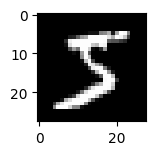

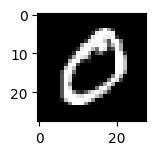

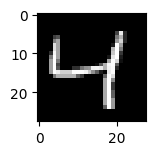

In [30]:
from matplotlib import pyplot
for i in range(3):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

In [31]:
import ivy
# ivy.set_torch_backend()
# ivy.set_numpy_backend()
class Net(ivy.Module):
  def __init__(self):
    self.conv1 = ivy.Conv2D(1, 32, [3,3], 1, "VALID")
    self.conv2 = ivy.Conv2D(32, 64, [3,3], 1, "VALID")
    self.conv1_drop = ivy.Dropout(0.25)
    self.conv2_drop = ivy.Dropout(0.5)
    self.fc1 = ivy.Linear(9216, 128)
    self.fc2 = ivy.Linear(128,10)
    super().__init__()

  def _forward(self, x):
    x = self.conv1(x)
    x = ivy.relu(x)
    x = self.conv2(x)
    x = ivy.relu(x)
    x = ivy.max_pool2d(x, [2,2], 2, 0)
    x = self.conv1_drop(x)
    x = ivy.flatten(x)
    x = self.fc1(x)
    x = ivy.relu(x)
    x = self.conv2_drop(x)
    x = self.fc2(x)
    output = ivy.log_softmax(x)
    return output

model = Net()

In [ ]:
for idx in range(train_X.shape[0]):
  print(f"{type(train_X[idx])=}, {type(train_y[idx])=}")

In [10]:
# import numpy as np
# my_x = np.expand_dims(train_X[0], axis=0)
my_x = ivy.empty((1,28,28,1))
my_x[:, :, :, 0] = ivy.array(train_X[0])

In [11]:
my_x.shape

ivy.Shape(1, 28, 28, 1)

In [13]:
my_y = train_y[0]
my_y

5

In [ ]:
model(ivy.array(my_x))

In [ ]:
my_x

In [ ]:
ivy.set_torch_backend()
def loss_fn(v, x, y):
  y_pred = model(x)
  return ivy.cross_entropy(y, y_pred)

x = my_x
y = my_y
x = ivy.array(x)
y = ivy.array(x)

loss, grads = ivy.execute_with_gradients(lambda v: loss_fn(v,x,y), model.v)
loss, grads